In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Canada.xlsx')
df.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


# Prepare Data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      196 non-null    object
 1   Coverage  196 non-null    object
 2   OdName    196 non-null    object
 3   AREA      196 non-null    int64 
 4   AreaName  196 non-null    object
 5   REG       196 non-null    int64 
 6   RegName   196 non-null    object
 7   DEV       196 non-null    int64 
 8   DevName   196 non-null    object
 9   1980      196 non-null    int64 
 10  1981      196 non-null    int64 
 11  1982      196 non-null    int64 
 12  1983      196 non-null    int64 
 13  1984      196 non-null    int64 
 14  1985      196 non-null    int64 
 15  1986      196 non-null    int64 
 16  1987      196 non-null    int64 
 17  1988      196 non-null    int64 
 18  1989      196 non-null    int64 
 19  1990      196 non-null    int64 
 20  1991      196 non-null    int64 
 21  1992      196 no

In [ ]:
df.isnull().sum()

Type        0
Coverage    0
OdName      0
AREA        0
AreaName    0
REG         0
RegName     0
DEV         0
DevName     0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(196, 43)

add coloumn total to data base

In [ ]:
#make copy of data base
df2 = df.copy()

In [ ]:
df2 = df2.drop(['Type','Coverage','OdName','AREA',	'AreaName','REG','RegName','DEV','DevName'], axis=1)

In [ ]:
df2['total2'] = df2.sum(axis=1)
df2['total2']

0       117278
1        31398
2       138878
3           12
4           30
        ...   
191          4
192       5970
193       3354
194      17196
195    1030118
Name: total2, Length: 196, dtype: int64

In [ ]:
total2 = df2['total2']
df.insert(43, "total", total2)

Rename Coloumns

In [ ]:
df.rename(columns= {'OdName': 'country', 'AreaName':'continent', 'RegName':'region'}, inplace=True)

In [ ]:
df.describe()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,913.204082,1247.739796,902.250000,730.290816,656.331633,618.239796,455.025510,450.367347,430.336735,506.892857,...,1337.969388,1283.877551,1207.923469,1261.448980,1286.581633,1432.076531,1269.122449,1315.831633,1321.535714,35327.612245
std,14.429997,1182.618008,6.959498,3664.971286,2484.869895,2198.843498,1529.175952,1580.492649,1469.775915,1529.161726,...,4421.525944,3923.791864,3442.092092,3691.110002,3822.816364,4454.546970,4020.795822,4236.731113,4227.087570,97814.332441
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,903.000000,914.000000,902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,...,28.750000,25.500000,31.500000,31.500000,36.500000,41.250000,37.750000,42.750000,45.000000,952.000000
50%,908.000000,922.000000,902.000000,13.500000,10.000000,11.500000,12.000000,13.500000,17.000000,19.500000,...,210.500000,224.000000,198.000000,205.000000,215.500000,213.500000,187.500000,234.000000,215.000000,5442.000000
75%,935.000000,926.000000,902.000000,263.000000,296.750000,292.250000,181.250000,189.000000,199.000000,257.000000,...,852.500000,849.250000,940.500000,956.250000,907.250000,938.000000,815.750000,790.000000,826.500000,22795.500000
max,999.000000,5501.000000,999.000000,44000.000000,24796.000000,20620.000000,13635.000000,14855.000000,14368.000000,13303.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [ ]:
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America', 'World'],
      dtype=object)

In [ ]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong Special Administrative Region',
       'China, Macao Special Administrative Region', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 

we need to deal with Country = 'Unknown' and continent = 'world', Reblace it oe remove,
if we see it's coloumn we will not found information to search about which this county is!
so we will remove it

Make country as index to make it eassy to access spesific country

In [ ]:
df.set_index('country', inplace = True)

In [ ]:
#remove index name
df.index.name = None

In [ ]:
df.loc['Unknown']

Type         Immigrants
Coverage     Foreigners
AREA                999
continent         World
REG                 999
region            World
DEV                 999
DevName           World
1980              44000
1981              18078
1982              16904
1983              13635
1984              14855
1985              14368
1986              13303
1987              17304
1988              22279
1989              27118
1990              28397
1991              25293
1992              33100
1993              34589
1994              30717
1995              25152
1996              25986
1997              23151
1998              13468
1999              10132
2000              10743
2001               7993
2002               5938
2003               4052
2004               3739
2005               4785
2006               4583
2007               4348
2008               4197
2009               3402
2010               3731
2011               2554
2012               1681
2013            

Drop not Unkown coloumn in country

In [ ]:
df.drop('Unknown', inplace=True)

Drop not necessary coloumns

In [ ]:
df.drop(['Type','Coverage', 'AREA', 'REG', 'DevName', 'DEV'],axis=1, inplace = True)

collect Years in list to make it easy when access it

In [ ]:
df.columns = list(map(str, df.columns))

In [ ]:
years = list(map(str, range(1980, 2014)))

# Data Visualization

In [ ]:
#get top 5 countries
df.sort_values('total', ascending=False, inplace= True)
df_top5 = df.head(5)

In [ ]:
df_top5

,continent,region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


Percentige of total Immigration in each continent




In [ ]:
top_continent = df.groupby('continent', axis = 0).sum('total')

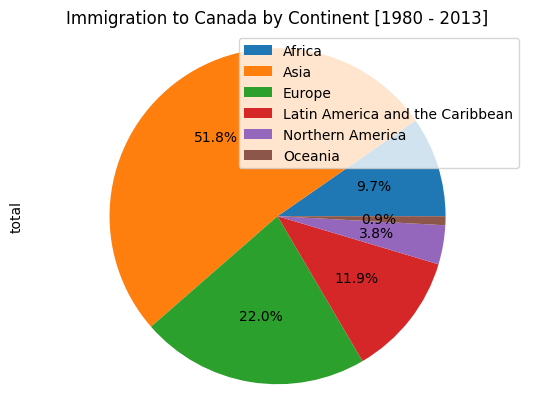

In [ ]:
#color_list = ['black', 'Red','blue']

top_continent['total'].plot(kind = 'pie',
                            autopct = '%1.1f%%',
                            labels=None,
                            #colors=color_list
                            )
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=top_continent.index, loc='upper right')


plt.show()


Top 5 Countries in Immigration

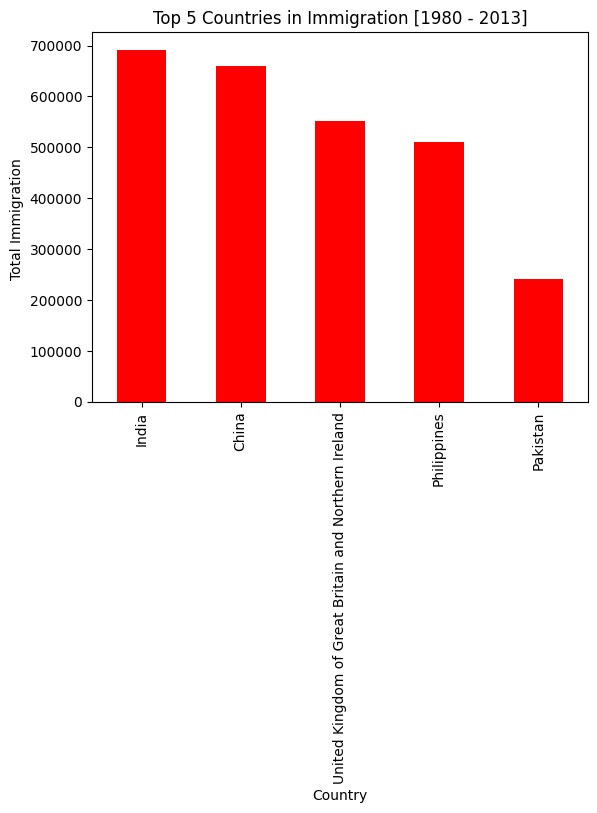

In [ ]:
df_top5['total'].plot(kind = 'bar', color = 'Red')
plt.title('Top 5 Countries in Immigration [1980 - 2013]')
plt.xlabel('Country')
plt.ylabel('Total Immigration ')
plt.show()

##More Details About Each Country of Top 5

### 1- India

In [ ]:
df_india = df.loc['India', years].transpose()

In [ ]:
df_india

1980     8880
1981     8670
1982     8147
1983     7338
1984     5704
1985     4211
1986     7150
1987    10189
1988    11522
1989    10343
1990    12041
1991    13734
1992    13673
1993    21496
1994    18620
1995    18489
1996    23859
1997    22268
1998    17241
1999    18974
2000    28572
2001    31223
2002    31889
2003    27155
2004    28235
2005    36210
2006    33848
2007    28742
2008    28261
2009    29456
2010    34235
2011    27509
2012    30933
2013    33087
Name: India, dtype: object

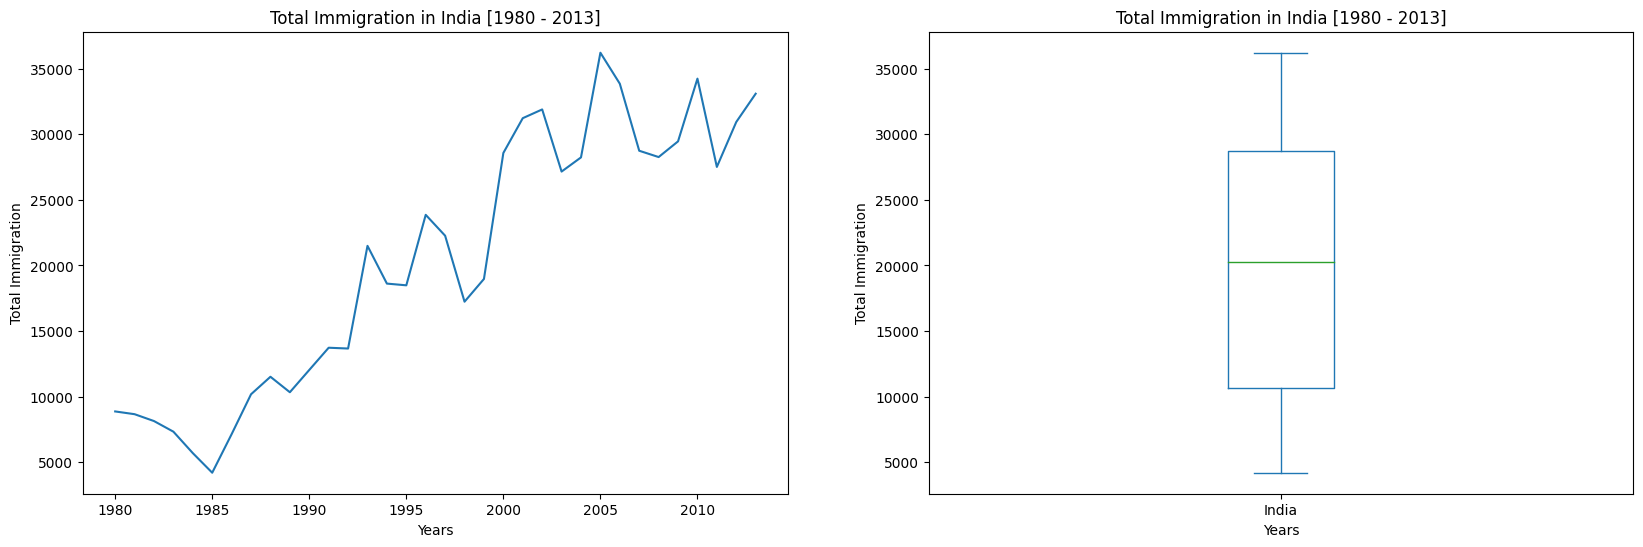

In [ ]:
fig = plt.figure()
id1 = fig.add_subplot(1, 2, 1)
id2 = fig.add_subplot(1, 2, 2)

#create Trend line to show number of Immigration over years
df_india.plot(kind = 'line', figsize=(20,6), ax=id1)
id1.set_title('Total Immigration in India [1980 - 2013]')
id1.set_xlabel('Years')
id1.set_ylabel('Total Immigration')

#create Trend Box Plot to show number of Immigration over years
df_india.plot(kind = 'box', figsize=(20,6), ax=id2)
id2.set_title('Total Immigration in India [1980 - 2013]')
id2.set_xlabel('Years')
id2.set_ylabel('Total Immigration')

plt.show()

From Fig we can colculsion that Most Year in Immigration is **2015**, and maxmum number of Immigration is over **35,000**, minimum is less than **5000**, 25% of them have number of Immigration around **12,000**, 75% of them have number of Immigration around **29,000**, and mediam about **20,000**

### 2- China

In [ ]:
df_china = df.loc['China', years].transpose()

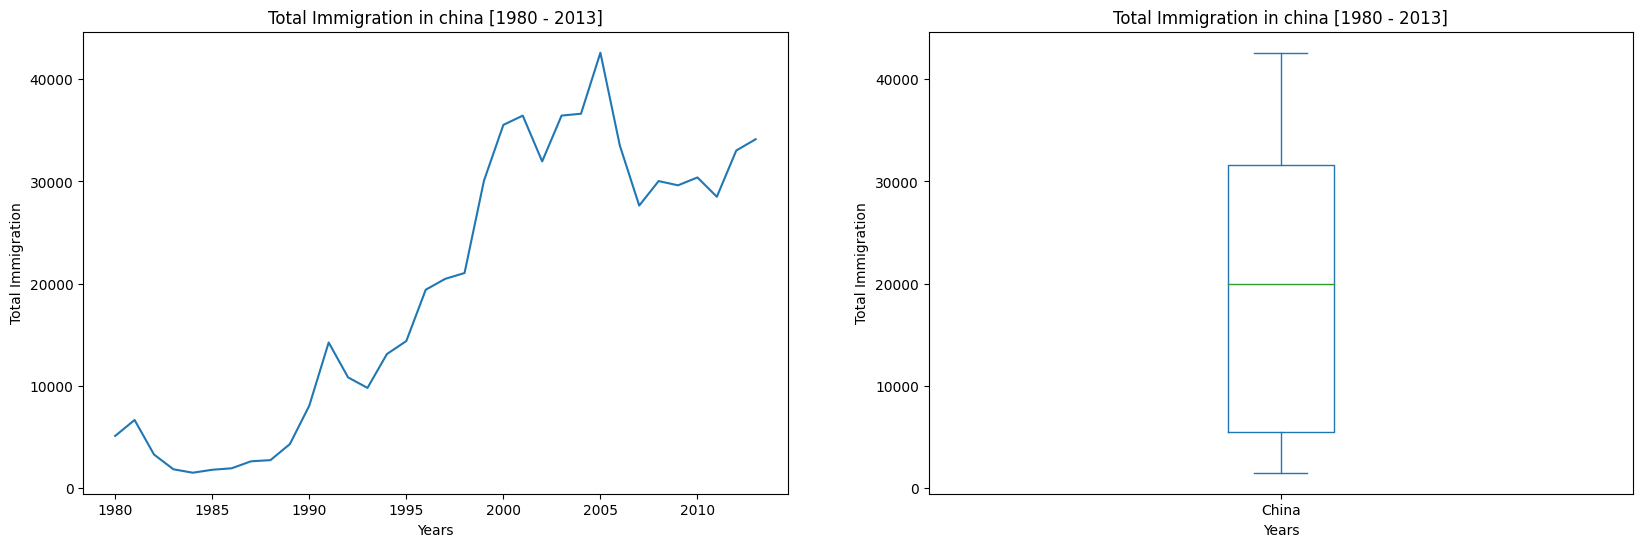

In [ ]:
fig = plt.figure()
ch1 = fig.add_subplot(1, 2, 1)
ch2 = fig.add_subplot(1, 2, 2)

#create Trend line to show number of Immigration over years
df_china.plot(kind = 'line', figsize=(20,6), ax=ch1)
ch1.set_title('Total Immigration in china [1980 - 2013]')
ch1.set_xlabel('Years')
ch1.set_ylabel('Total Immigration')

#create Trend Box Plot to show number of Immigration over years
df_china.plot(kind = 'box', figsize=(20,6), ax=ch2)
ch2.set_title('Total Immigration in china [1980 - 2013]')
ch2.set_xlabel('Years')
ch2.set_ylabel('Total Immigration')

plt.show()

From Fig we can colculsion that Most Year in Immigration is **2015**, and maxmum number of Immigration is over **40,000**, minimum is less than **1000**, 25% of them have number of Immigration around **4,000**, 75% of them have number of Immigration around **32,000**, and mediam about **20,000**

### 3- United Kingdom of Great Britain and Northern Ireland

In [ ]:
df_uk = df.loc['United Kingdom of Great Britain and Northern Ireland', years].transpose()

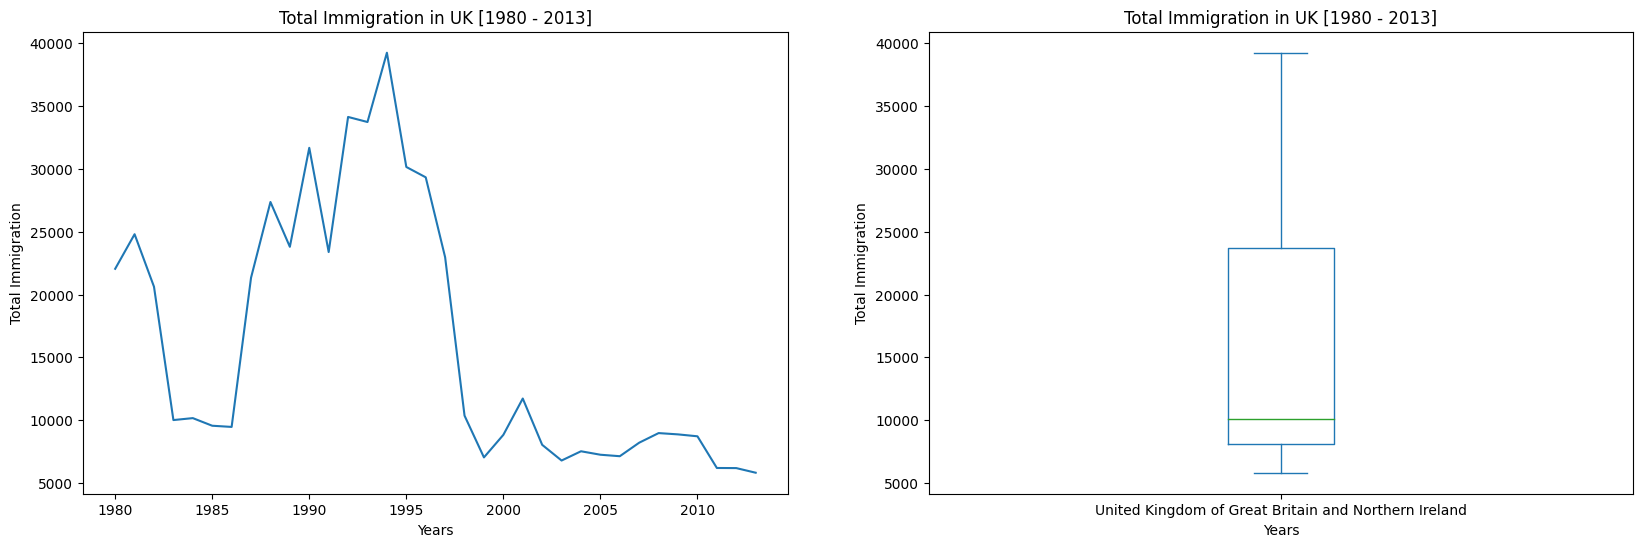

In [ ]:
fig = plt.figure()
uk1 = fig.add_subplot(1, 2, 1)
uk2 = fig.add_subplot(1, 2, 2)

#create Trend line to show number of Immigration over years
df_uk.plot(kind = 'line', figsize=(20,6), ax=uk1)
uk1.set_title('Total Immigration in UK [1980 - 2013]')
uk1.set_xlabel('Years')
uk1.set_ylabel('Total Immigration')

#create Trend Box Plot to show number of Immigration over years
df_uk.plot(kind = 'box', figsize=(20,6), ax=uk2)
uk2.set_title('Total Immigration in UK [1980 - 2013]')
uk2.set_xlabel('Years')
uk2.set_ylabel('Total Immigration')

plt.show()

From Fig we can colculsion that Most Year in Immigration is **1994**, and maxmum number of Immigration is about **39,000**, minimum is about **6000**, 25% of them have number of Immigration around **7,000**, 75% of them have number of Immigration around **23,000**, and mediam about **9,000**

### 4- Philippines

In [ ]:
df_PH = df.loc['Philippines', years].transpose()

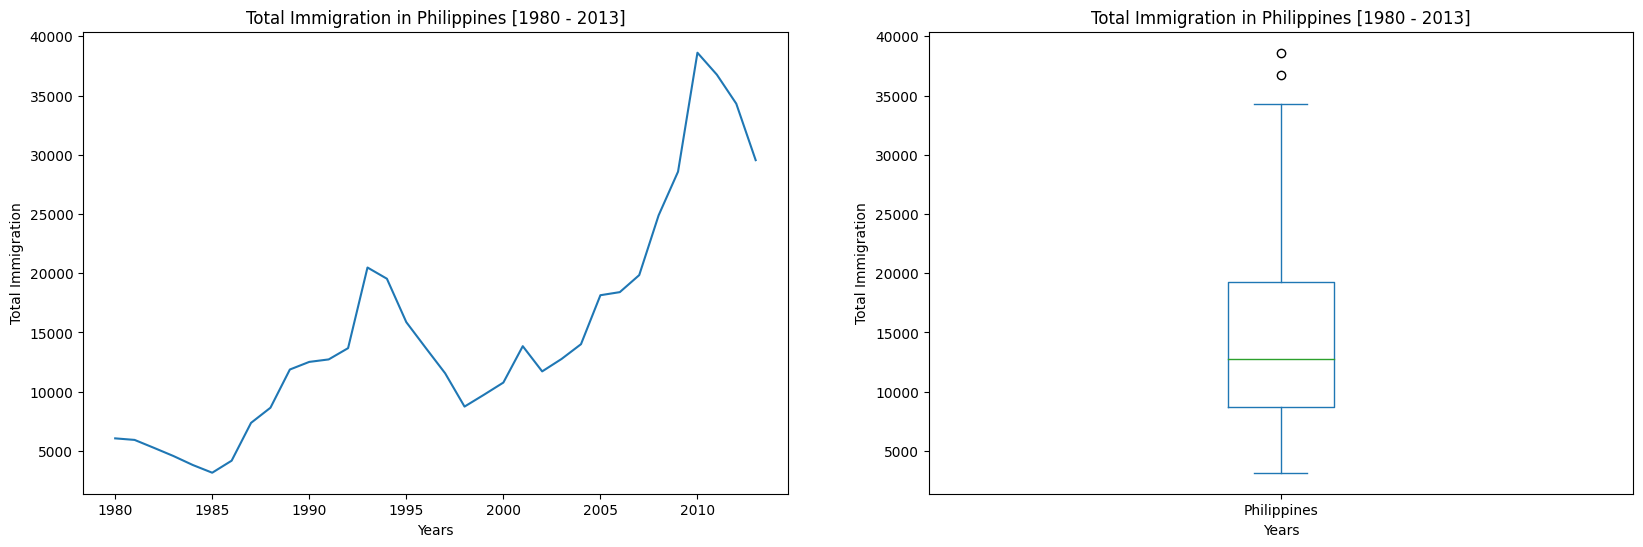

In [ ]:
fig = plt.figure()
ph1 = fig.add_subplot(1, 2, 1)
ph2 = fig.add_subplot(1, 2, 2)

#create Trend line to show number of Immigration over years
df_PH.plot(kind = 'line', figsize=(20,6), ax=ph1)
ph1.set_title('Total Immigration in Philippines [1980 - 2013]')
ph1.set_xlabel('Years')
ph1.set_ylabel('Total Immigration')

#create Trend Box Plot to show number of Immigration over years
df_PH.plot(kind = 'box', figsize=(20,6), ax=ph2)
ph2.set_title('Total Immigration in Philippines [1980 - 2013]')
ph2.set_xlabel('Years')
ph2.set_ylabel('Total Immigration')

plt.show()

### 5- Pakistan

In [ ]:
df_pk = df.loc['Pakistan', years].transpose()

Text(0, 0.5, 'Total Immigration')

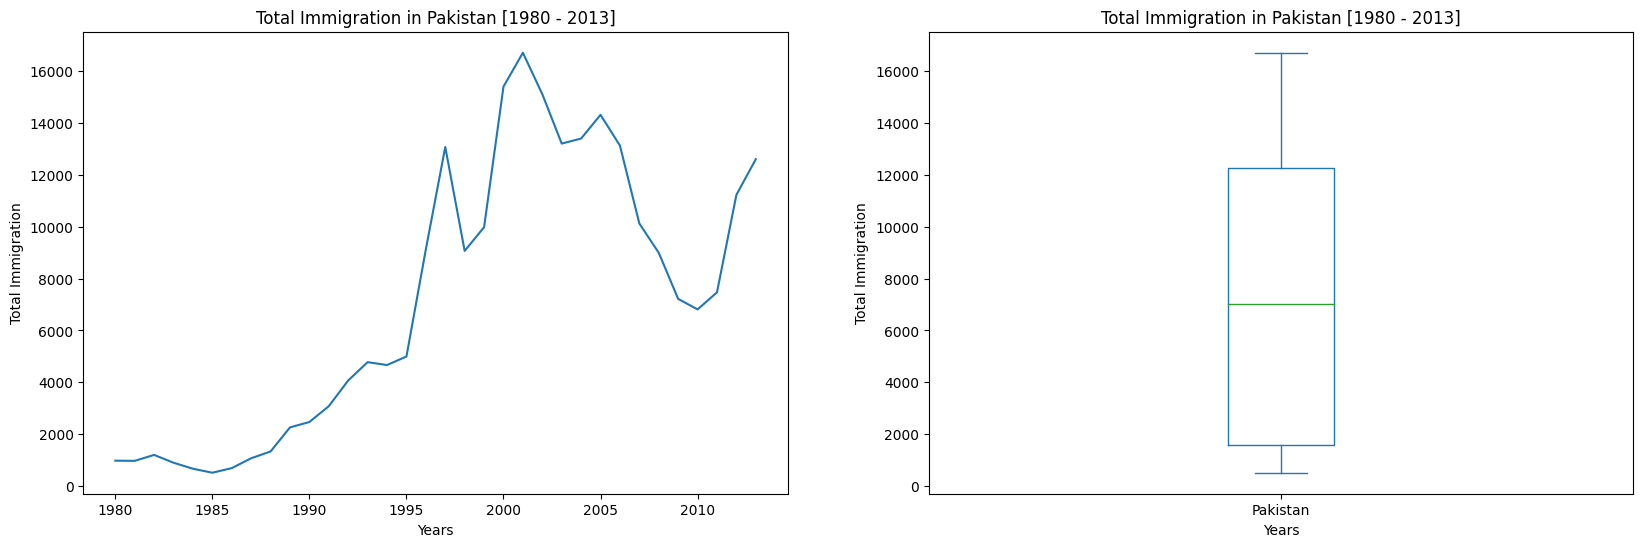

In [ ]:
fig = plt.figure()
pk1 = fig.add_subplot(1,2,1)
pk2 = fig.add_subplot(1,2,2)

#create Trend line to show number of Immigration over years
df_pk.plot(kind = 'line', figsize = (20,6) , ax = pk1)
pk1.set_title('Total Immigration in Pakistan [1980 - 2013]')
pk1.set_xlabel('Years')
pk1.set_ylabel('Total Immigration')

#create boxplot to show number of Immigration over years
df_pk.plot(kind = 'box', figsize = (20,6) , ax = pk2)
pk2.set_title('Total Immigration in Pakistan [1980 - 2013]')
pk2.set_xlabel('Years')
pk2.set_ylabel('Total Immigration')


Top 15 Country At Asia in Immigration [1980 - 2013]

In [ ]:
df_asia = df[df['continent'] == 'Asia']

In [ ]:
df_asia.sort_values('total', ascending=False, inplace= True)
df_asia_top = df_asia.head(15)

<ipython-input-114-f2d6f03f4849>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia.sort_values('total', ascending=False, inplace= True)


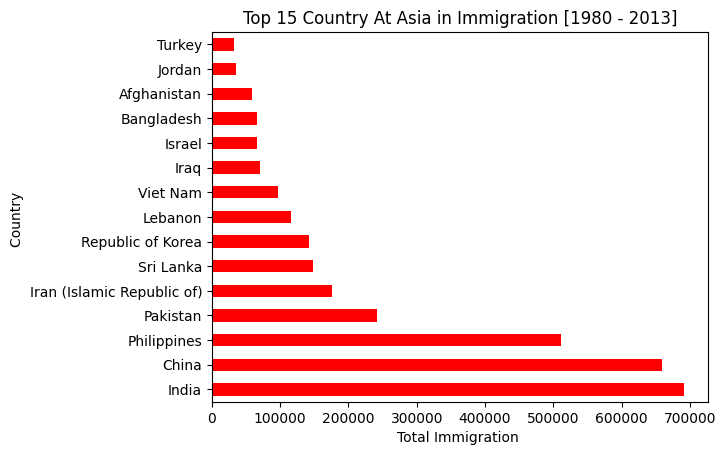

In [ ]:
df_asia_top['total'].plot(kind = 'barh', color = 'Red')
plt.title('Top 15 Country At Asia in Immigration [1980 - 2013]')
plt.xlabel('Total Immigration ')
plt.ylabel('Country ')
plt.show()

Top 15 Country At Europe in Immigration [1980 - 2013]

In [ ]:
df['continent'].unique()

array(['Asia', 'Europe', 'Northern America',
       'Latin America and the Caribbean', 'Africa', 'Oceania'],
      dtype=object)

In [ ]:
df_Europe = df[df['continent'] == 'Europe']
df_Europe.sort_values('total', ascending=False, inplace= True)
df_Europe_top = df_Europe.head(15)

<ipython-input-122-d1a5cd1a7234>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Europe.sort_values('total', ascending=False, inplace= True)


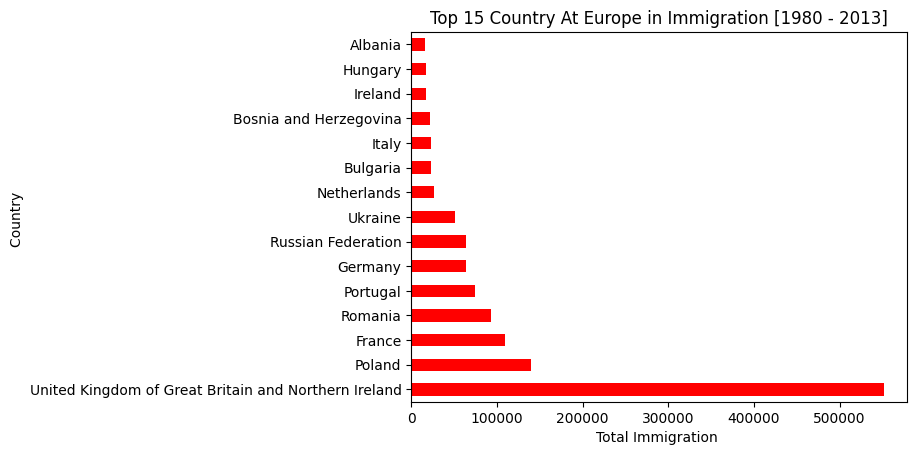

In [ ]:
df_Europe_top['total'].plot(kind = 'barh', color = 'Red')
plt.title('Top 15 Country At Europe in Immigration [1980 - 2013]')
plt.xlabel('Total Immigration ')
plt.ylabel('Country ')
plt.show()

Top Countries At Northern America in Immigration [1980 - 2013]

<ipython-input-126-c8acf0a37dde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NA.sort_values('total', ascending=False, inplace= True)


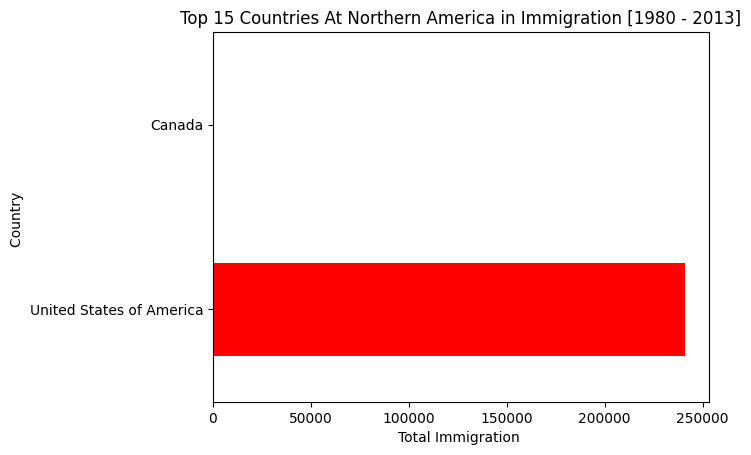

In [ ]:
df_NA = df[df['continent'] == 'Northern America']
df_NA.sort_values('total', ascending=False, inplace= True)
df_NA_top = df_NA.head(15)

#Make Visual
df_NA_top['total'].plot(kind = 'barh', color = 'Red')
plt.title('Top 15 Countries At Northern America in Immigration [1980 - 2013]')
plt.xlabel('Total Immigration ')
plt.ylabel('Country ')
plt.show()

Top Countries At Latin America and the Caribbean in Immigration [1980 - 2013]

<ipython-input-127-ae07de5321a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA.sort_values('total', ascending=False, inplace= True)


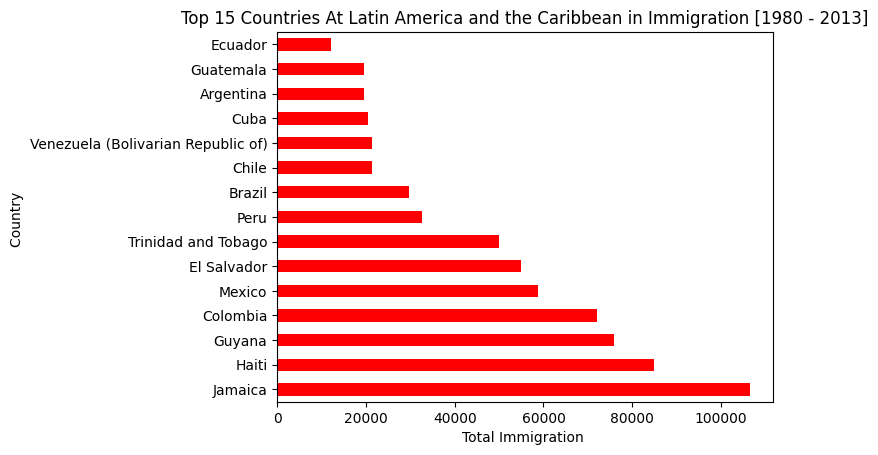

In [ ]:
df_LA = df[df['continent'] == 'Latin America and the Caribbean']
df_LA.sort_values('total', ascending=False, inplace= True)
df_LA_top = df_LA.head(15)

#Make Visual
df_LA_top['total'].plot(kind = 'barh', color = 'Red')
plt.title('Top 15 Countries At Latin America and the Caribbean in Immigration [1980 - 2013]')
plt.xlabel('Total Immigration ')
plt.ylabel('Country ')
plt.show()

Top Countries At Africa in Immigration [1980 - 2013]

<ipython-input-130-766d5e102c50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Africa.sort_values('total', ascending=False, inplace= True)


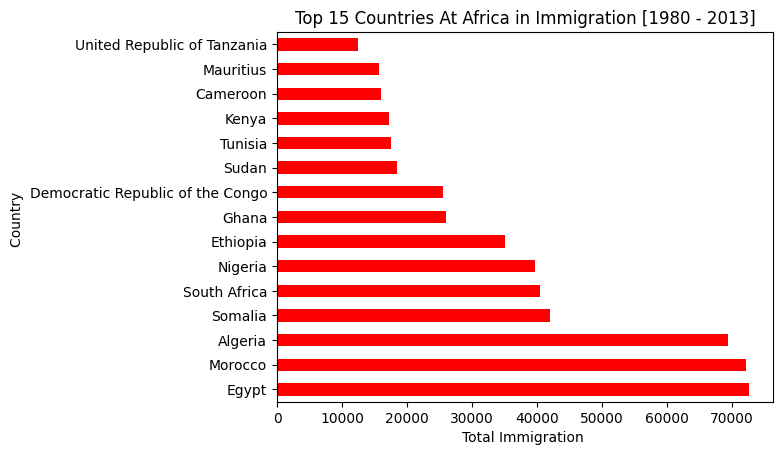

In [ ]:
df_Africa = df[df['continent'] == 'Africa']
df_Africa.sort_values('total', ascending=False, inplace= True)
df_Africa_top = df_Africa.head(15)

#Make Visual
df_Africa_top['total'].plot(kind = 'barh', color = 'red')
plt.title('Top 15 Countries At Africa in Immigration [1980 - 2013]')
plt.xlabel('Total Immigration ')
plt.ylabel('Country ')
plt.show()